# Principal Component Analysis

## import library

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [123]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)
print('number of data :',number_data)
print('number of feature :',number_feature)

number of data : 50
number of feature : 2


## plot the input data

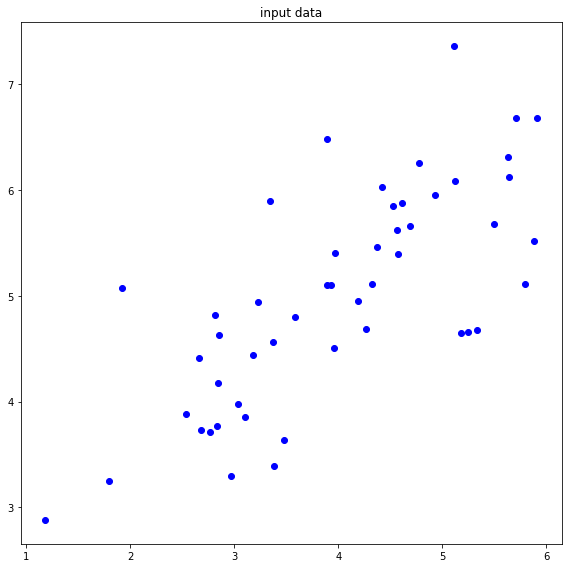

In [124]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x,y,'bo')
plt.tight_layout()
plt.show()

## Normalization (Z-scoring)

In [179]:
Z_x = (x-x.mean(axis=0)) / x.std(axis = 0)
Z_y = (y-y.mean(axis=0)) / y.std(axis = 0)
print('mean of x =',np.mean(Z_x))
print('mean of y =',np.mean(Z_y))
print('std of x =',np.std(Z_x))
print('std of y =',np.std(Z_y))
def plot_data (Z_x,Z_y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    plt.plot(Z_x,Z_y,'bo')

    plt.tight_layout()
    plt.show()

mean of x = -1.509903313490213e-16
mean of y = -4.840572387365683e-16
std of x = 0.9999999999999999
std of y = 0.9999999999999999


## compute covariance matrix

In [126]:
def compute_covariance(feature):
    number_data = feature.shape[1]
    Sigma = np.matmul(feature, feature.T)    
    Sigma = Sigma/number_data
    return Sigma

## compute principal directions

In [127]:
def compute_eigen(X):
    S,U = np.linalg.eig(X)
    return S, U

In [185]:
data = np.array((Z_x,Z_y))
cov = compute_covariance(data)
eigen_value, eigen_vector = compute_eigen(cov)
def plot_eigenvector(Z_x,Z_y,eigen_vector):
    plt.figure(figsize=(8,8))
    plt.title('principal directions')
    

   
    print(eigen_value, eigen_vector)
    plt.annotate('',xy=(eigen_vector[0]), xytext = (0,0), arrowprops = dict(color = 'red'))
    plt.annotate('',xy=(eigen_vector[1]), xytext = (0,0), arrowprops = dict(color = 'green'))
    plt.plot(Z_x,Z_y,'bo')
    plt.tight_layout()
    plt.show()

## first principal axis

In [187]:
def first_principal_axis(eigen_vector,Z_x,Z_y):    
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')

    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)

    yy1 = eigen_vector[0][1]*xx1/eigen_vector[0][0]


    plt.plot(xx1,yy1,'r-')


    plt.plot(Z_x,Z_y,'bo')

    plt.tight_layout()
    plt.show()

## second principal axis

In [189]:
def second_principal_axis(eigen_vector,Z_x,Z_y):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')

    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)  

    yy2 = eigen_vector[1][1]*xx1/eigen_vector[1][0]



    plt.plot(xx1,yy2,'r-')

    plt.plot(Z_x,Z_y,'bo')

    plt.tight_layout()
    plt.show()

## compute the projection of point onto the line

In [136]:
# feature : m*n  vector : m*1 
def compute_projection_onto_line(feature, vector):
    feature_vector = vector * feature.T
    feature_vector = feature_vector.sum(axis = 1)
    feature_vector = feature_vector / np.sum(vector**2)
    feature_vector = np.tile(feature_vector,(2,1))
    projection = vector*feature_vector.T
    return projection

## projcet to the first principal axis

In [191]:
def project_first(Z_x,Z_y,eigen_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)

    yy1 = eigen_vector[0][1]*xx1/eigen_vector[0][0]
    plt.plot(xx1,yy1,'r-')
    proj = compute_projection_onto_line(data,eigen_vector[0])
    plt.scatter(proj.T[0],proj.T[1],color = 'green', marker= 'o')
    print(proj.shape)
    plt.plot(Z_x,Z_y,'bo')

    plt.tight_layout()
    plt.show()

## projcet to the second principal axis

In [193]:
def project_second(Z_x,Z_y,eigen_vector):    
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)  

    yy2 = eigen_vector[1][1]*xx1/eigen_vector[1][0]
    plt.plot(xx1,yy2,'r-')
    proj = compute_projection_onto_line(data,eigen_vector[1])
    plt.scatter(proj.T[0],proj.T[1],color = 'green', marker= 'o')
    plt.plot(Z_x,Z_y,'bo')

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the first principal axis

In [195]:
def first_connect(Z_x,Z_y,eigen_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)

    yy1 = eigen_vector[0][1]*xx1/eigen_vector[0][0]
    plt.plot(xx1,yy1,'r-')
    proj = compute_projection_onto_line(data,eigen_vector[0])
    plt.scatter(proj.T[0],proj.T[1],color = 'green', marker= 'o')
    plt.plot(Z_x,Z_y,'bo')



    for i in range(len(Z_x)):
        plt.annotate('',xy=(proj[i][0],proj[i][1]), xytext = (Z_x[i],Z_y[i]), arrowprops = dict(color = 'gray',arrowstyle='-'))

    plt.tight_layout()
    plt.show()

## connect original data to the projection onto the second principal axis

In [197]:
def second_connect(Z_x,Z_y,eigen_vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    xx1 = np.linspace(Z_x.min(),Z_x.max(),10)  

    yy2 = eigen_vector[1][1]*xx1/eigen_vector[1][0]
    plt.plot(xx1,yy2,'r-')
    proj = compute_projection_onto_line(data,eigen_vector[1])
    plt.scatter(proj.T[0],proj.T[1],color = 'green', marker= 'o')
    plt.plot(Z_x,Z_y,'bo')



    for i in range(len(Z_x)):
        plt.annotate('',xy=(proj[i][0],proj[i][1]), xytext = (Z_x[i],Z_y[i]), arrowprops = dict(color = 'gray',arrowstyle='-'))
    plt.tight_layout()
    plt.show()

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

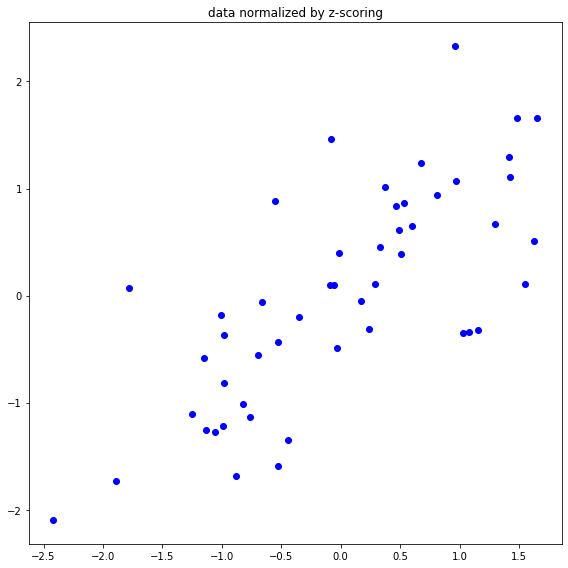

In [180]:
plot_data (Z_x,Z_y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

[1.73553 0.26447] [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


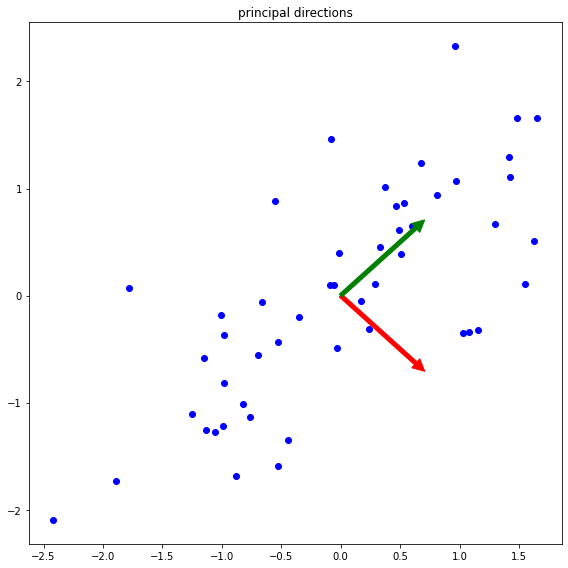

In [186]:
plot_eigenvector(Z_x,Z_y,eigen_vector)

***

### 3. plot the first principal axis in red on the normalized data in blue

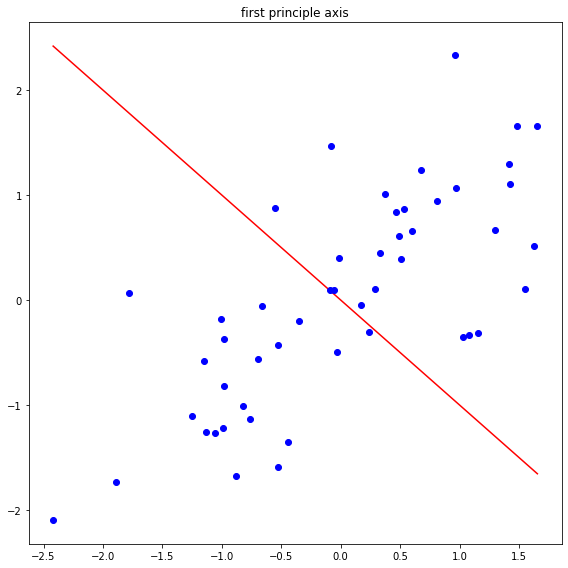

In [188]:
first_principal_axis(eigen_vector,Z_x,Z_y)

***

### 4. plot the second principal axis in red on the normalized data in blue

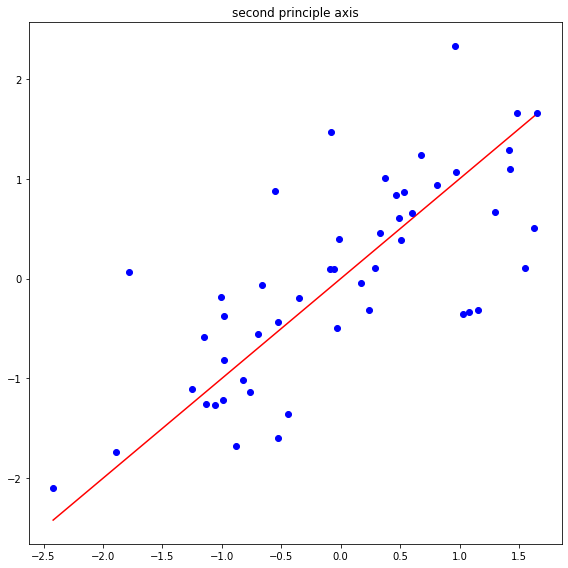

In [190]:
second_principal_axis(eigen_vector,Z_x,Z_y)

***

### 5. plot the projection of data in green onto the first principal axis in red

(50, 2)


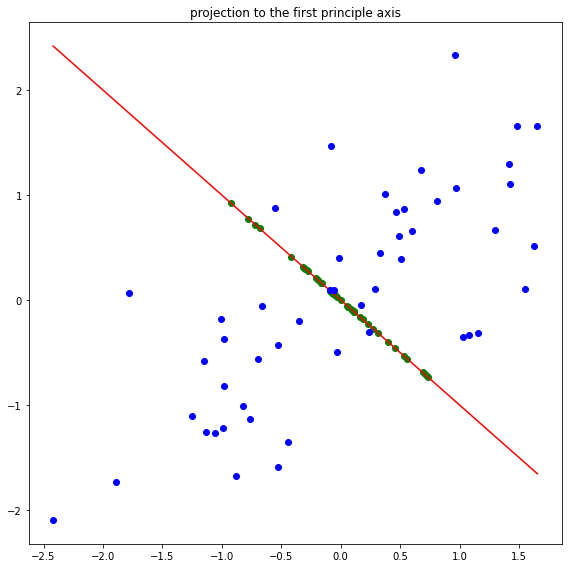

In [192]:
project_first(Z_x,Z_y,eigen_vector)

***

### 6. plot the projection of data in green onto the second principal axis in red

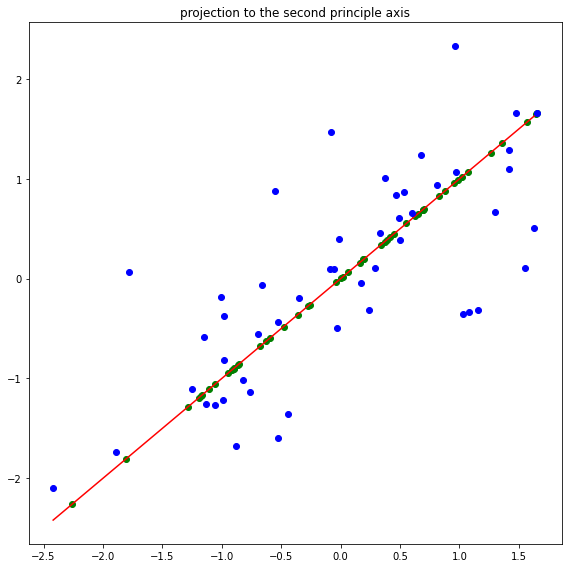

In [194]:
project_second(Z_x,Z_y,eigen_vector)

***

### 7. plot the projection line in grey onto the first principal axis

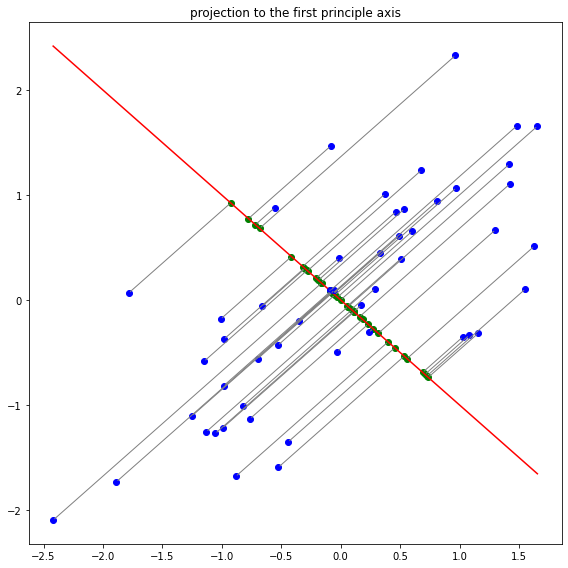

In [196]:
first_connect(Z_x,Z_y,eigen_vector)

***

### 8. plot the projection line in grey onto the second principal axis

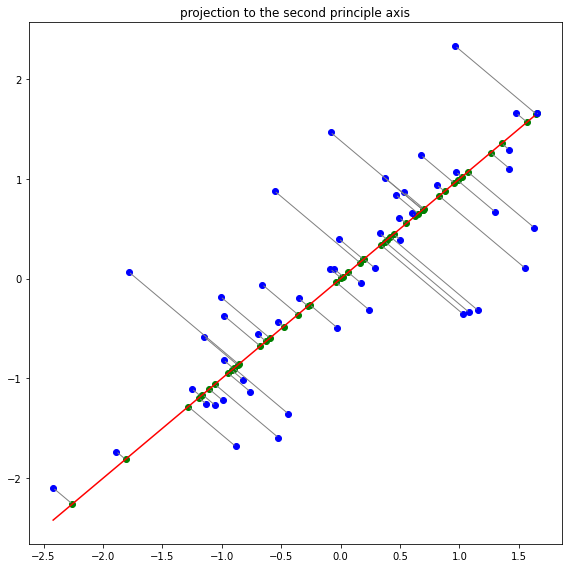

In [199]:
second_connect(Z_x,Z_y,eigen_vector)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***